# Exploratory Data Analysis on Polycystic Ovary Syndrome (PCOS)

## Introduction

Polycystic ovary syndrome, or PCOS, is one of the most common causes of female infertility, [afffecting as many as 5 million American women who are of childbearing age.](https://www.endocrine.org/patient-engagement/endocrine-library/pcos#:~:text=PCOS%20affects%207%E2%80%9310%25%20of,t%20know%20they%20have%20it) Women who have PCOS produce more male hormones than what is considered to be normal, which may impact their overall heath, even past their childbearing years. Symptoms can be different for every woman, which makes it very difficult to diagnose. This analysis explores various PCOS symptoms or variables that increase the likelihood of a PCOS diagnosis or infertility. In this analysis, I will explore three specific questions:

 1. Are there any features that are correlated with PCOS?
 2. What are the most frequent symptoms PCOS pateints exihibit?
 3. Do non-PCOS patients exhibit similar symptoms to those diagnosed with PCOS?

## About the Data

This data includes all physical and clinical parameters from a group of patients collected from ten different hospitals across Kerala, India. The original data set and notebook can be found on [Kaggle](https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos?select=PCOS_infertility.csv). The data set contains one Comma Separated Values (CSV) file and one Excel file.  
 - `PCOS_Data_without_infertility`: Contains 45 columns (representing different parameters) and 541 rows (representing different patients identified by a Patient File Number). Excel file type.
 - `PCOS_infertility`: Contains 6 columns (representing different parameters) and 541 rows (representing different patients idenfitied by a Patient File Number). CSV file type.
 
Because this data requires background knowledge and context to understand the features and what they represent, a Data Dictionary is provided below.  

In [1]:
import pandas as pd 
pd.set_option('display.max_colwidth', 0)

data_dict_filepath = "C:\\Users\\sarah\\OneDrive\\Documents\\NYCDS_Bootcamp\\Project 1\\PCOS_Data_Dictionary.csv"

PCOS_Data_Dict = pd.read_csv(data_dict_filepath)

PCOS_Data_Dict

,Variable,Data Type,Description,Context,Reference,Relevancy to Analysis
0,Sl. No,Integer,Row Index,Included with original data set.,NaN,Low
1,Patient File No.,Integer,Unique patient file identifier,Total of 1082 Patient File Numbers,NaN,High
2,PCOS (Y/N),Boolean,True represents if the patient was diagnosed with PCOS. False represents the patient has not been diagnosed with PCOS.,"If the patient has not been diagnosed with PCOS (False), this does not mean that this patient could not be diagnosed with PCOS in the future.",NaN,High
3,Age (yrs),Integer,Patient age,Research suggests that 35 and older women have a higher risk of pregnancy-related complications.,NaN,Medium
4,Weight (Kg),Integer,Patient weight in kilograms,NaN,Cleveland Clinic,Medium
5,Height(Cm),Integer,Patient height in centimeters,NaN,NaN,Medium
6,BMI,Integer,Body Mass Index of patient,Calculated by Weight (Kg) / (Height (M) *2). A value of 30 and above indicates obsesity in adults.,Cleveland Clinic,High
7,Blood Group,Integer,Blood types represented as integers,"A+ = 11, A- = 12, B+ = 13, O+ = 15, O- = 16, AB+ = 17, AB- = 18",Cleveland Clinic,Medium
8,Pulse rate(bpm),Integer,Heart beats per minute,"For adults (ages 18+), the expected resting heart rate range is 60 - 100 bpm.",Cleveland Clinic,Low
9,RR (breaths/min),Integer,Respiration rate measured in breaths per minute.,"For adults (ages 18+), the expected respiratory rate is 12 to 20 breaths per minute.",Cleveland Clinic,Low


## Questions of Interest

PCOS patients experience a wide variety of symptoms, and each woman experiences a range of symptoms throughout each individual cycle. Because of this, I would like to center my analysis on three main questions:

 1. Are there any features that are correlated with PCOS?
 2. What are the most frequent symptoms PCOS pateints exihibit?
 3. Do non-PCOS patients exhibit similar symptoms to those diagnosed with PCOS?

## Data Inspection

Before exploring the questions of interest in the data, we will inspect it to get a sense of it's general construct. In the data inspection, we will complete the following tasks:

- Load the data.
- Describe the data (shape, structure and descriptive statistics). 
- Inspect the data including missing values or `NaN` values. 
- Make intial observations about the data for subsequent steps such as data cleaning and pre-processing.

Before we begin the inspection, we first import the necessary libraries for data analysis:
 - `numpy as np`: Used for linear algebra or matrix math. 
 - `pandas as pd`: Used for data analysis in a tabular structure. 
 - `matplotlib.pyplot as plt`: Used for plotting data. 
 - `seaborn as sns`: Subpackage of Matplotlib used for statistical data visualization. 
 - `stats from scipy`: Used as the base package for `pingouin`
 - `pingouin as pg`: Used for inferential statistics and statistical analysis.

In [2]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import pingouin as pg

Load the data. 
- If you are loading the data locally after downloading the data from Kaggle, please copy and paste the file paths to the `file_path_with_infertility` and `file_path_without_infertility` variables respectively.

In [3]:
file_path_with_infertility = "C:\\Users\\sarah\\OneDrive\\Documents\\NYCDS_Bootcamp\\Project 1\\PCOS_infertility.csv"
file_path_without_infertility = "C:\\Users\\sarah\\OneDrive\\Documents\\NYCDS_Bootcamp\\Project 1\\PCOS_data_without_infertility.xlsx"

PCOS_inf = pd.read_csv(file_path_with_infertility)

PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name = "Full_new")

C:\Users\sarah\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Observations:

 - `PCOS_inf` has 541 rows and 6 columns. Additional exploration to find location of `NaN` values.
 - `PCOS_woinf` has 541 rows and 45 columns. Additional exploration to find location of `NaN` values and `Unnamed:` columns.

In [4]:
PCOS_inf.describe(exclude = 'category').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sl. No,541.0,NaN,NaN,NaN,271.0,156.317519,1.0,136.0,271.0,406.0,541.0
Patient File No.,541.0,NaN,NaN,NaN,10271.0,156.317519,10001.0,10136.0,10271.0,10406.0,10541.0
PCOS (Y/N),541.0,NaN,NaN,NaN,0.327172,0.469615,0.0,0.0,0.0,1.0,1.0
I beta-HCG(mIU/mL),541.0,NaN,NaN,NaN,664.549235,3348.920576,1.3,1.99,20.0,297.21,32460.97
II beta-HCG(mIU/mL),541.0,NaN,NaN,NaN,238.229518,1603.826221,0.110417,1.99,1.99,97.63,25000.0
AMH(ng/mL),541,301,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
PCOS_woinf.describe(exclude = 'category').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sl. No,541.0,NaN,NaN,NaN,271.0,156.317519,1.0,136.0,271.0,406.0,541.0
Patient File No.,541.0,NaN,NaN,NaN,271.0,156.317519,1.0,136.0,271.0,406.0,541.0
PCOS (Y/N),541.0,NaN,NaN,NaN,0.327172,0.469615,0.0,0.0,0.0,1.0,1.0
Age (yrs),541.0,NaN,NaN,NaN,31.430684,5.411006,20.0,28.0,31.0,35.0,48.0
Weight (Kg),541.0,NaN,NaN,NaN,59.637153,11.028287,31.0,52.0,59.0,65.0,108.0
Height(Cm),541.0,NaN,NaN,NaN,156.484835,6.033545,137.0,152.0,156.0,160.0,180.0
BMI,541.0,NaN,NaN,NaN,24.311285,4.056399,12.417882,21.641274,24.238227,26.634958,38.9
Blood Group,541.0,NaN,NaN,NaN,13.802218,1.840812,11.0,13.0,14.0,15.0,18.0
Pulse rate(bpm),541.0,NaN,NaN,NaN,73.247689,4.430285,13.0,72.0,72.0,74.0,82.0
RR (breaths/min),541.0,NaN,NaN,NaN,19.243993,1.688629,16.0,18.0,18.0,20.0,28.0


First data frame `PCOS_woinf` without infertility has 541 rows and 45 columns, but with an `Unnamed: 44` column. This column will need to be explored and possibly removed.

In [6]:
PCOS_woinf.shape

(541, 45)

Second data frame `PCOS_inf` with only infertility records has 541 records and 6 columns.

In [7]:
PCOS_inf.shape

(541, 6)

In [8]:
PCOS_woinf["Unnamed: 44"].unique

<bound method Series.unique of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
536    NaN
537    NaN
538    NaN
539    NaN
540    NaN
Name: Unnamed: 44, Length: 541, dtype: object>

Observations:

- The `PCOS_woinf` has multiple records with `NaN` due to what looks like a formatting issue in the Comma Seperated Value (CSV) file that was imported as a DataFrame. We will need to drop the `NaN` values from these rows. 

In [9]:
PCOS_woinf.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


In [10]:
PCOS_woinf.tail()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
536,537.0,537.0,0.0,35.0,50.0,164.592,18.5,17.0,72.0,16.0,...,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7,NaN
537,538.0,538.0,0.0,30.0,63.2,158.000,25.3,15.0,72.0,18.0,...,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2,NaN
538,539.0,539.0,0.0,36.0,54.0,152.000,23.4,13.0,74.0,20.0,...,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3,NaN
539,540.0,540.0,0.0,27.0,50.0,150.000,22.2,15.0,74.0,20.0,...,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5,NaN
540,541.0,541.0,1.0,23.0,82.0,165.000,30.1,13.0,80.0,20.0,...,1.0,0.0,120.0,70.0,9.0,10.0,19.0,18.0,6.9,NaN


Observations:

- `PCOS_woinf` has 541 entries or rows. 
- All columns are of `float64` type except for `BMI`, `FSH/LH`, `Waist:Hip Ratio`, and `AMH(ng/mL)` which are of `object` type.

In [11]:
PCOS_woinf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    fl

Observations:

 - `PCOS_inf` has 541 entries or rows with a total of 6 columns as we found from the `shape()` function above. 
 - `PCOS_inf` has all `int` and `float` types, except for column `AMH(ng/mL)` which is of `object` type. 

In [12]:
PCOS_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB


### Important Note About the Data
- Upon initial inspection, I identified that each record in each DataFrame had a unique Patient File Number which would indicate files for unique patients. 
- Also, I recognized that the file names `PCOS_woinf` and `PCOS_inf` would indicate patients were not diagnosed with "Unexplained Infertility" and patients that were diagnosed with "Unexplained Infertility".
- However, upon further inspection, the data in both files, are the same with different Pateint File Numbers. 
- Because of these observations, I will exclude the `PCOS_inf` for the main Explanatory Data Analasis. 
- Because of these observations, I will only use the `PCOS_woinf` in the main analysis.

## Data Preparation

#### Data Cleaning:

 - Find and remove `NaN` values.
 - Drop `Unnamed:` columns. 
 - Find and remove duplicates.
 - Remove white space in column names.

#### Data Pre-Processing:
 - Calculate correct values for `BMI`, `FSH/LH`, and `Waist:Hip Ratio` columns.
 - Convert Y/N columns to Boolean types.
 - Drop `SL No.`, `Cycle(R/I)`, `Marraige Status (Yrs)`, and `Fast food (Y/N)` columns as they are either ill-defined from the data source is not necessary for our analysis. 

Find all `NaN` values in `PCOS_woinf`.

In [13]:
num_nulls_in_PCOS_woinf = np.sum(PCOS_woinf.isnull(), axis=0)

Remove the `NaN` values from rows and columns in `PCOS_woinf`.

In [14]:
PCOS_woinf = PCOS_woinf.dropna(axis = 0, how = 'all').dropna(axis = 1, how = 'any')

Check to see if `NaN` values were removed from `PCOS_woinf`. 

In [15]:
num_nulls_in_PCOS_woinf

Sl. No                    0  
Patient File No.          0  
PCOS (Y/N)                0  
 Age (yrs)                0  
Weight (Kg)               0  
Height(Cm)                0  
BMI                       0  
Blood Group               0  
Pulse rate(bpm)           0  
RR (breaths/min)          0  
Hb(g/dl)                  0  
Cycle(R/I)                0  
Cycle length(days)        0  
Marraige Status (Yrs)     1  
Pregnant(Y/N)             0  
No. of aborptions         0  
  I   beta-HCG(mIU/mL)    0  
II    beta-HCG(mIU/mL)    0  
FSH(mIU/mL)               0  
LH(mIU/mL)                0  
FSH/LH                    0  
Hip(inch)                 0  
Waist(inch)               0  
Waist:Hip Ratio           0  
TSH (mIU/L)               0  
AMH(ng/mL)                0  
PRL(ng/mL)                0  
Vit D3 (ng/mL)            0  
PRG(ng/mL)                0  
RBS(mg/dl)                0  
Weight gain(Y/N)          0  
hair growth(Y/N)          0  
Skin darkening (Y/N)      0  
Hair loss(

Remove `Unnamed:` columns from `PCOS_woinf`. 

In [16]:
PCOS_woinf = PCOS_woinf.loc[:, ~PCOS_woinf.columns.str.contains('^Unnamed')]

Find duplicates in `PCOS_woinf`.

In [17]:
PCOS_woinf.duplicated().sum()

0

Replace `BMI` with the [correct calculation](https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm). 

In [18]:
PCOS_woinf['Height (m)'] = PCOS_woinf['Height(Cm) '] / 100

PCOS_woinf['BMI'] = PCOS_woinf['Weight (Kg)'] / (PCOS_woinf['Height (m)'] ** 2)

Replace `FSH/LH` with the correct calculation.

In [19]:
PCOS_woinf['FSH/LH'] = PCOS_woinf['FSH(mIU/mL)'] / PCOS_woinf['LH(mIU/mL)']

Replace `Waist:Hip Ratio` with the correct calculation. 

In [20]:
PCOS_woinf['Waist:Hip Ratio'] = PCOS_woinf['Waist(inch)'] / PCOS_woinf['Hip(inch)']

Add a column `Weight (lbs)` converting weight in kg to weight in lbs for readability.

In [21]:
PCOS_woinf['Weight (lbs)'] = PCOS_woinf['Weight (Kg)'] * 2.205

Create a column `Blood Type (str)` that is represented by the string value vs. the numerical representation defined. 

In [22]:
PCOS_woinf['Blood Type (str)'] = PCOS_woinf['Blood Group'].replace([11, 12, 13, 14, 15, 16, 17, 18], ['A+', 'A-', 'B+', 'B-', 'O+', 'O-', 'AB+', 'AB-'] )

Convert blood pressure to the correct format systolic over diastolic. [Reference Link](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings).

In [23]:
PCOS_woinf['Blood Pressure (str)'] = PCOS_woinf['BP _Systolic (mmHg)'].astype(str) + '/' + PCOS_woinf['BP _Diastolic (mmHg)'].astype(str)
PCOS_woinf['Blood Pressure (str)'] = PCOS_woinf['Blood Pressure (str)'].replace(['nan/nan'], np.nan)
PCOS_woinf['Blood Pressure (str)']

0      110.0/80.0
1      120.0/70.0
2      120.0/80.0
3      120.0/70.0
4      120.0/80.0
          ...    
536    110.0/70.0
537    110.0/70.0
538    110.0/80.0
539    110.0/70.0
540    120.0/70.0
Name: Blood Pressure (str), Length: 541, dtype: object

Correct spelling and rename column headers.

In [24]:
PCOS_woinf.rename(columns = {'No. of aborptions': 'No. of Abortions'}, inplace = True)
PCOS_woinf.rename(columns = {'Pimples(Y/N)': 'Acne (Y/N)'}, inplace = True)

 - Change non-string types to floats for numerical variables. 
 - Received `ValueError: Unable to parse string "1.99." at position 123.`
 - Used replace method to `replace` method into format that can be coerced with `to_numeric`.

In [25]:
PCOS_woinf['II    beta-HCG(mIU/mL)'] = PCOS_woinf['II    beta-HCG(mIU/mL)'].replace(['1.99.'], '1.99')
PCOS_woinf['II    beta-HCG(mIU/mL)'] = pd.to_numeric(PCOS_woinf['II    beta-HCG(mIU/mL)'])

In [26]:
PCOS_woinf['Waist:Hip Ratio'] = pd.to_numeric(PCOS_woinf['Waist:Hip Ratio'])

- For `PCOS_main['AMH(ng/mL)']` recieved `ValueError` at position 307 with the value 'a'. 
- Since this was the only string value in this numerical column, I chose to replace this string with the mean of the column to avoid dropping that record.

In [27]:
PCOS_woinf['AMH(ng/mL)'] = pd.to_numeric(PCOS_woinf['AMH(ng/mL)'], errors = 'coerce').astype('float64')
PCOS_woinf['AMH(ng/mL)'] = PCOS_woinf['AMH(ng/mL)'].fillna(PCOS_woinf['AMH(ng/mL)'].mean())

- Change the type of the categorical variable columns to `bool` from `float64`:
 - `Pregnant (Y/N)`
 - `Weight gain (Y/N)`
 - `hair growth (Y/N)`
 - `Skin darkening (Y/N)`
 - `Hair loss (Y/N)`
 - `Acne (Y/N)`
 - `Reg.Exercise (Y/N)`

In [28]:
PCOS_woinf['Pregnant(Y/N)'] = PCOS_woinf['Pregnant(Y/N)'].astype('bool')
PCOS_woinf['Weight gain(Y/N)'] = PCOS_woinf['Weight gain(Y/N)'].astype('bool')
PCOS_woinf['hair growth(Y/N)'] = PCOS_woinf['hair growth(Y/N)'].astype('bool')
PCOS_woinf['Skin darkening (Y/N)'] = PCOS_woinf['Skin darkening (Y/N)'].astype('bool')
PCOS_woinf['Hair loss(Y/N)'] = PCOS_woinf['Hair loss(Y/N)'].astype('bool')
PCOS_woinf['Acne (Y/N)'] = PCOS_woinf['Acne (Y/N)'].astype('bool')
PCOS_woinf['Reg.Exercise(Y/N)'] = PCOS_woinf['Reg.Exercise(Y/N)'].astype('bool')

- Drop `Sl. No` as this seems like a duplicate column and will not add value to our analysis.
- Drop `Cycle(R/I)` column as this variable was not well-defined in the information about the original data set.
- Drop `Fast food (Y/N)` column as this variable was not well-defined in the information about the original data set. 
- Drop `Marriage Status (Yrs)` as this is an independent variable and no research indicates that would have an impact on a PCOS diagnosis.

In [29]:
#PCOS_woinf.drop(['Sl. No'], axis = 1, inplace = True)
#PCOS_woinf.drop(['Cycle(R/I)'], axis = 1, inplace = True)
#PCOS_woinf.drop(['Fast food (Y/N)'], axis = 1, inplace = True)
#PCOS_woinf.drop(['Marraige Status (Yrs)'], axis = 1, inplace = True)

Double check `NaN` values are removed before moving on to analysis. We want the return to be `False` indicating that there are non `NaN` values found in the DataFrame.

In [30]:
PCOS_woinf.isnull().values.any()

False

Check Dtypes in `PCOS_woinf` before moving on to analysis.

In [31]:
PCOS_woinf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Pregnant(Y/N)           541 non-null    bool   
 14  No. of Abortions        541 non-null    fl

Get rid of extra space before and after column headers.

In [32]:
PCOS_woinf.columns = [col.strip() for col in PCOS_woinf.columns]
PCOS_woinf.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Age (yrs)', 'Weight (Kg)',
       'Height(Cm)', 'BMI', 'Blood Group', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Pregnant(Y/N)', 'No. of Abortions', 'I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Acne (Y/N)',
       'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Height (m)',
       'Weight (lbs)', 'Blood Type (str)', 'Blood Pressure (str)'],
      dtype='object')

In [33]:
PCOS_woinf.dtypes.value_counts()

float64    37
bool       7 
object     2 
dtype: int64

## Exploratory Data Analysis

In this section, I will continue to explore the datato make inferences for further analysis keeping in mind our three questions:

 1. Are there any features that are correlated with PCOS?
 2. What are the most frequent symptoms PCOS pateints exihibit?
 3. Do non-PCOS patients exhibit similar symptoms to those diagnosed with PCOS?

In [34]:
PCOS_woinf.groupby("PCOS (Y/N)").mean(numeric_only=True)

,Sl. No,Patient File No.,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Height (m),Weight (lbs)
PCOS (Y/N),,,,,,,,,,,,,,,,,,,,,
0.0,264.357143,264.357143,32.065934,58.008791,156.197934,23.754439,13.755495,72.964286,19.200549,11.107390,...,0.228022,114.620879,76.780220,4.351648,4.637363,14.687637,15.225824,8.315027,1.561979,127.909385
1.0,284.661017,284.661017,30.124294,62.985876,157.074847,25.481118,13.898305,73.830508,19.333333,11.268305,...,0.288136,114.745763,77.231638,9.785311,10.762712,15.697740,15.916215,8.806780,1.570748,138.883856


In [35]:
#Set sylistic themes for Seaborn plots.
sns.set(style = "white")
light = sns.color_palette("light:#5A9", as_cmap=True)

Plot a correlation matrix to see if any of the features are correlated with other features in the data set. The higher the number is to 1, the more likely that this is correlated with the other feature in the matrix.

[Text(0.5, 1.0, 'PCOS Correlation Matrix')]

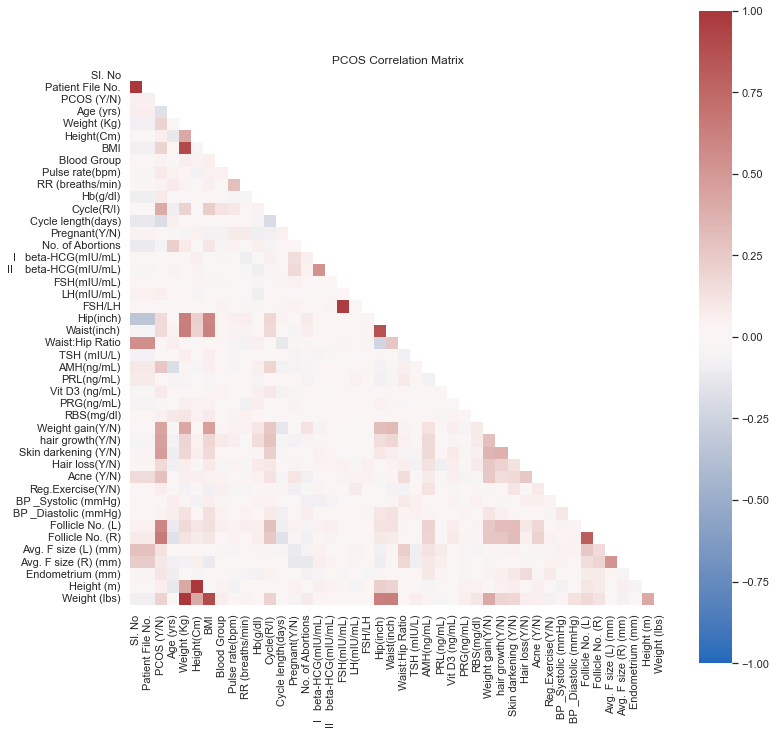

In [36]:
coorelation_matrix = PCOS_woinf.corr().round(2)
mask = np.triu(np.ones_like(coorelation_matrix))
plt.subplots(figsize = (12, 12))
sns.heatmap(coorelation_matrix, vmax = 1, vmin = -1, cmap = "vlag", square = True, mask = mask).set(title = "PCOS Correlation Matrix")

Because the matrix is so large, it is difficult to see what features are coorelated with other features. Just from the heat map above, we can make a couple of observations:

- Follicles in the left and right overaries and symptoms such as skin darkening, hair growth and weight gain are highly correlated with PCOS. 
- We can validate these correlation values with what the research has told us so far. PCOS patients are more likely to have a number of follicles that likely will not mature and therefore will prevent the pateint from ovulating or having a 'regular' cycle. 
- Skin darkening, hair growth and weight gain are all symptoms that are most frequent in PCOS patients due to over production of male linked hormones. 

Next Steps:
- Drop variables that have a value of 0.7 or more for further analysis in a one-way ANOVA.
- Because `Weight (Kg)` and `Weight (lbs)` and `BMI` are corrrelated at .90, I will drop `Weight (Kg)` and `Weight (lbs)` from the two-way ANOVA to prevent duplicating highly correlated variables.
- Dropping `Follicle (L)` since it's highly correlated at .80 with `Follicle (R)`.
- Dropping `FSH/LH` as it's highly correlated with `FSH(mIU/mL)`. 
- Dropping `Hip(inch)` as it's highly correlated with `Waist(inch)`. 
- Dropping `Height (cm)` as it's highly correlated with `Height (m)`.

In [37]:
coorelation_matrix_filtered = coorelation_matrix.unstack()
coorelation_matrix_filtered = coorelation_matrix_filtered[abs(coorelation_matrix_filtered) >= 0.7]

print(coorelation_matrix_filtered)

Sl. No                  Sl. No                    1.00
                        Patient File No.          1.00
Patient File No.        Sl. No                    1.00
                        Patient File No.          1.00
PCOS (Y/N)              PCOS (Y/N)                1.00
Age (yrs)               Age (yrs)                 1.00
Weight (Kg)             Weight (Kg)               1.00
                        BMI                       0.90
                        Weight (lbs)              1.00
Height(Cm)              Height(Cm)                1.00
                        Height (m)                1.00
BMI                     Weight (Kg)               0.90
                        BMI                       1.00
                        Weight (lbs)              0.90
Blood Group             Blood Group               1.00
Pulse rate(bpm)         Pulse rate(bpm)           1.00
RR (breaths/min)        RR (breaths/min)          1.00
Hb(g/dl)                Hb(g/dl)                  1.00
Cycle(R/I)

Created a new DataFrame `PCOS_woinf_ANOVA` dropping all columns that were noted above due to correlation value of 0.7 or more and categorical (other than `PCOS (Y/N)`) for one-way ANOVA analysis.

In [38]:
PCOS_woinf_ANOVA = PCOS_woinf[['PCOS (Y/N)', 'Age (yrs)', 'BMI', 'Pulse rate(bpm)',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)',
       'No. of Abortions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Height (m)']]

In [39]:
PCOS_woinf_ANOVA = PCOS_woinf_ANOVA.rename(columns = {'PCOS (Y/N)': "PCOS", 'Age (yrs)': "Age", 'Pulse rate(bpm)': "Pulse_Rate", 'RR (breaths/min)': "Resp_Rate", 'Hb(g/dl)': "Hemoglobin", 'Cycle length(days)' : "Cycle_Length", 'No. of Abortions': "Num_Abortions", 'I   beta-HCG(mIU/mL)': "HCG_Read_1", 'II    beta-HCG(mIU/mL)': "HCG_Read_2", 'FSH(mIU/mL)': "Follicle_Stim_Horm", 'LH(mIU/mL)': "Luteninizing_Horm", 'Waist(inch)': "Waist_in", 'Waist:Hip Ratio': "Waist_Hip_Ratio", 'TSH (mIU/L)': "Thyroid_Horm", 'AMH(ng/mL)': "Anti_Mull_Horm", 'PRL(ng/mL)': "Prolactin", 'Vit D3 (ng/mL)': "Vit_D", 'PRG(ng/mL)': "Progesterone", 'RBS(mg/dl)': "Random_Blood_Sug", 'BP _Systolic (mmHg)': "Systolic", 'BP _Diastolic (mmHg)': "Diastolic", 'Follicle No. (R)': "Foll_No_R", 'Avg. F size (L) (mm)': "Avg_Foll_Size_L", 'Avg. F size (R) (mm)': "Avg_Foll_Size_R", 'Endometrium (mm)': "Endometrium", 'Height (m)' :"Height_m"})

In [40]:
PCOS_woinf_ANOVA.columns

Index(['PCOS', 'Age', 'BMI', 'Pulse_Rate', 'Resp_Rate', 'Hemoglobin',
       'Cycle_Length', 'Num_Abortions', 'HCG_Read_1', 'HCG_Read_2',
       'Follicle_Stim_Horm', 'Luteninizing_Horm', 'Waist_in',
       'Waist_Hip_Ratio', 'Thyroid_Horm', 'Anti_Mull_Horm', 'Prolactin',
       'Vit_D', 'Progesterone', 'Random_Blood_Sug', 'Systolic', 'Diastolic',
       'Foll_No_R', 'Avg_Foll_Size_L', 'Avg_Foll_Size_R', 'Endometrium',
       'Height_m'],
      dtype='object')

In [41]:
PCOS_woinf_ANOVA.shape

(541, 27)

### Hypothesis Testing

My null hypothesis is that the mean of each variable is equal to the same mean of that variable to patients that have PCOS. I will set my significance level to 0.05 so that I can be 95% confident in my conclusion and accept 5% error that my conclusions are incorrect.

- $H_0$: $\mu_{PCOS_{β}}$ = $\mu_{non-PCOS_{β}}$

- $H_a$: $\mu_{PCOS_{β}}$ $\neq$ $\mu_{non-PCOS_{β}}$

_Where ${β}$ is equal to the each independent variable or feature in the dataset and $\alpha $ $= 0.05$._

Given that our hypothesis is true, if the probability of observing the average of that variable is extreme or as extreme as the one we observed is higher than the significance level, $\alpha $ $= 0.05$, then we fail to reject (retain) the null hypothesis. 

- If the $p-value$ is greater than $\alpha $, we would retain $H_0$, meaning we have sufficient statistical evidence to assume that the variable we are observing is not correlated with a PCOS diagnosis. 
- If the $p-value$ is lower than $\alpha $, we would reject $H_0$ in favor of $H_a$, meaning that we have enough statistical evidence to assume that particular variable is correlated with a PCOS diagnosis and is therefore significant.

In [42]:
pg.anova(dv = 'PCOS', between = ['Age'], data = PCOS_woinf_ANOVA)
#0.007 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to suggest that age is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Age,28,512,1.812795,0.007146,0.090196


In [43]:
pg.anova(dv = 'PCOS', between = ['BMI'], data = PCOS_woinf_ANOVA).round(3)
#0.086 > 0.05, retain H0.We have enough statistical \
#evidence to suggest that BMI is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,BMI,386,154,1.209,0.086,0.752


In [44]:
pg.anova(dv = 'PCOS', between = ['Pulse_Rate'], data = PCOS_woinf_ANOVA).round(3)
#0.393 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that Pulse Rate is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Pulse_Rate,10,530,1.058,0.393,0.02


In [45]:
pg.anova(dv = 'PCOS', between = ['Resp_Rate'], data = PCOS_woinf_ANOVA).round(3)
#0.21 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that Respirtory Rate is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Resp_Rate,7,533,1.383,0.21,0.018


In [46]:
pg.anova(dv = 'PCOS', between = ['Hemoglobin'], data = PCOS_woinf_ANOVA).round(3)
#0.243 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that Hemoglobin is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Hemoglobin,45,495,1.147,0.243,0.094


In [47]:
pg.anova(dv = 'PCOS', between = ['Cycle_Length'], data = PCOS_woinf_ANOVA)
#0.0 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that Cycle length is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Cycle_Length,11,529,10.368536,2.689072e-17,0.177363


In [48]:
pg.anova(dv = 'PCOS', between = ['Num_Abortions'], data = PCOS_woinf_ANOVA).round(3)
#0.544 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that the number of abortions is NOT correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,Num_Abortions,5,535,0.808,0.544,0.007


In [49]:
pg.anova(dv = 'PCOS', between = ['HCG_Read_1'], data = PCOS_woinf_ANOVA).round(3)
#0.059 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that HCG is NOT correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,HCG_Read_1,306,234,1.214,0.059,0.614


In [50]:
pg.anova(dv = 'PCOS', between = ['HCG_Read_2'], data = PCOS_woinf_ANOVA).round(3)
#0.238 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that HCG is NOT correlated with a PCOS diagnosis.
#This second reading would be a confirmation of the first. 

,Source,ddof1,ddof2,F,p-unc,np2
0,HCG_Read_2,201,339,1.092,0.238,0.393


In [51]:
pg.anova(dv = 'PCOS', between = ['Follicle_Stim_Horm'], data = PCOS_woinf_ANOVA)
#0.022 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that the Follicle Stimulating Hormone is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Follicle_Stim_Horm,370,170,1.310372,0.022304,0.740394


In [52]:
pg.anova(dv = 'PCOS', between = ['Luteninizing_Horm'], data = PCOS_woinf_ANOVA).round(3)
#0.133 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that the Luteninzing Hormone is NOT correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,Luteninizing_Horm,341,199,1.153,0.133,0.664


In [53]:
pg.anova(dv = 'PCOS', between = ['Waist_in'], data = PCOS_woinf_ANOVA).round(3)
#0.003 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that Waist measurement is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Waist_in,22,518,2.105,0.003,0.082


In [54]:
pg.anova(dv = 'PCOS', between = ['Waist_Hip_Ratio'], data = PCOS_woinf_ANOVA).round(3)
#0.029 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that Waist:Hip Ratio is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Waist_Hip_Ratio,91,449,1.342,0.029,0.214


In [55]:
pg.anova(dv = 'PCOS', between = ['Thyroid_Horm'], data = PCOS_woinf_ANOVA).round(3)
#0.23 > 0.05, retain H0. The Luteninzing Hormone is NOT correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,Thyroid_Horm,307,233,1.096,0.23,0.591


In [56]:
pg.anova(dv = 'PCOS', between = ['Anti_Mull_Horm'], data = PCOS_woinf_ANOVA)
#0.0 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that Anti-Mullarian Hormone is correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,Anti_Mull_Horm,300,240,1.631257,0.000042,0.670952


In [57]:
pg.anova(dv = 'PCOS', between = ['Prolactin'], data = PCOS_woinf_ANOVA)
#0.011 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that Prolactin is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Prolactin,480,60,1.626332,0.010587,0.928626


In [58]:
pg.anova(dv = 'PCOS', between = ['Vit_D'], data = PCOS_woinf_ANOVA).round(3)
#0.1 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that Vitamin D is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Vit_D,330,210,1.177,0.1,0.649


In [59]:
pg.anova(dv = 'PCOS', between = ['Random_Blood_Sug'], data = PCOS_woinf_ANOVA).round(3)
#0.483 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that Random Blood Sugar is NOT correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,Random_Blood_Sug,54,486,0.998,0.483,0.1


In [60]:
pg.anova(dv = 'PCOS', between = ['Progesterone'], data = PCOS_woinf_ANOVA).round(3)
#0.466 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that Progesterone is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Progesterone,88,452,1.008,0.466,0.164


In [61]:
pg.anova(dv = 'PCOS', between = ['Systolic'], data = PCOS_woinf_ANOVA).round(3)
#0.886 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that Systolic blood pressure is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Systolic,5,535,0.344,0.886,0.003


In [62]:
pg.anova(dv = 'PCOS', between = ['Diastolic'], data = PCOS_woinf_ANOVA).round(3)
#0.754 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that Diastolic blood pressure is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Diastolic,4,536,0.475,0.754,0.004


In [63]:
pg.anova(dv = 'PCOS', between = ['Foll_No_R'], data = PCOS_woinf_ANOVA)
#0.0 < 0.05, reject H0 in favor of Ha. We have enough statistical \
#evidence to assume that Follicle Count in the right ovary is correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Foll_No_R,19,521,24.37326,6.429953e-60,0.470578


In [64]:
pg.anova(dv = 'PCOS', between = ['Avg_Foll_Size_L'], data = PCOS_woinf_ANOVA).round(3)
#0.17 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that Avg Follicle Size in the left ovary does NOT impact PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Avg_Foll_Size_L,30,510,1.253,0.17,0.069


In [65]:
pg.anova(dv = 'PCOS', between = ['Avg_Foll_Size_R'], data = PCOS_woinf_ANOVA).round(3)
#0.611 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that Avg Follicle Size in the right ovary is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Avg_Foll_Size_R,31,509,0.909,0.611,0.052


In [66]:
pg.anova(dv = 'PCOS', between = ['Endometrium'], data = PCOS_woinf_ANOVA).round(3)
#0.435 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that Endometrium lining measurement is NOT correlated with a PCOS diagnosis. 

,Source,ddof1,ddof2,F,p-unc,np2
0,Endometrium,90,450,1.021,0.435,0.17


In [67]:
pg.anova(dv = 'PCOS', between = ['Height_m'], data = PCOS_woinf_ANOVA).round(3)
#0.6 > 0.05, retain H0. We have enough statistical \
#evidence to suggest that Height is NOT correlated with a PCOS diagnosis.

,Source,ddof1,ddof2,F,p-unc,np2
0,Height_m,49,491,0.936,0.6,0.085


Now that th ANOVA tests are completed we will plot the p-values of the features that are suggested to be correlated  with PCOS for a visual summary.

In [68]:
#Create a dictionary containing all Features and corresponding P-Values that are correlated with PCOS.
corr_pvals = { 'Features': ['Age', 'BMI', 'Pulse_Rate', 'Resp_Rate', 'Hemoglobin',
       'Cycle_Length', 'Num_Abortions', 'HCG_Read_1', 'HCG_Read_2',
       'Follicle_Stim_Horm', 'Luteninizing_Horm', 'Waist_in',
       'Waist_Hip_Ratio', 'Thyroid_Horm', 'Anti_Mull_Horm', 'Prolactin',
       'Vit_D', 'Progesterone', 'Random_Blood_Sug', 'Systolic', 'Diastolic',
       'Foll_No_R', 'Avg_Foll_Size_L', 'Avg_Foll_Size_R', 'Endometrium',
       'Height_m'],
            'P-Values': [0.007146, 0.086, 0.393, 0.21, 0.243, 2.689072e-17, 0.544, 0.059, 0.238, 0.022304, 
                         0.133, 0.003, 0.029, 0.23, 0.000042, 0.010587, 0.1, 0.466, 0.483, 0.886, 0.754, 
                         6.429953e-60, 0.17, 0.611, 0.435, 0.6]}

In [69]:
#Create the data frame from the dictionary above and sort by highest to lowest P-value recieved from each ANOVA. 
corr_pvals_df = pd.DataFrame.from_dict(corr_pvals)
corr_pvals_df = corr_pvals_df.sort_values(by = 'P-Values', ascending = True)

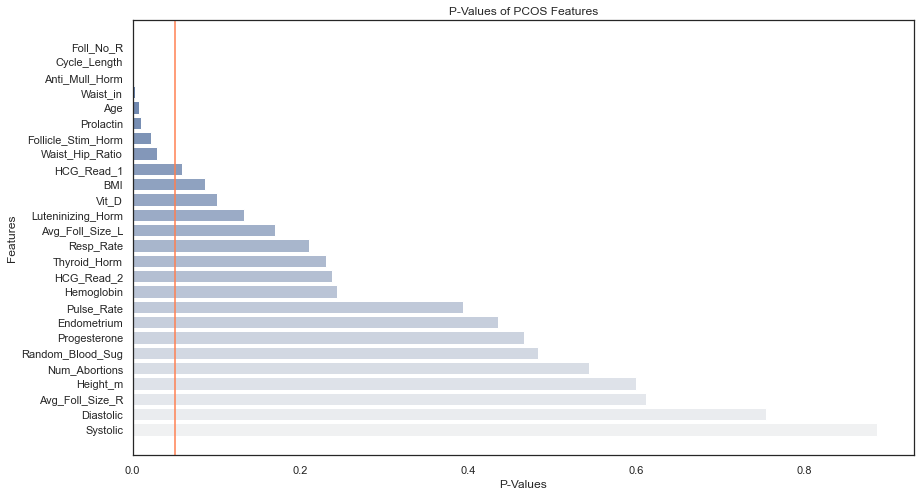

In [70]:
#Create the bar plot of P-values.
fig, vax = plt.subplots(figsize = (14, 8))
sns.barplot(x = "P-Values", y = "Features", data = corr_pvals_df, orient = "h", palette = "light:b_r").set(title = 'P-Values of PCOS Features')
plt.vlines([0.05], 0, 1, transform = vax.get_xaxis_transform(), colors ='coral')


From the above inferential statistical analysis, evidence suggests that the features that differ from PCOS diagnosed patients and non-PCOS patients are the following:

- `Foll_No_R`
- `Cycle_Length`
- `Anti_Mull_Horm`
- `Waist_in`
- `Age`
- `Prolactin`
- `Follicle_Stim_Horm`
- `Waist_Hip_Ratio`

If we were a patient or a provider, we could start our examination with these characteristics to see if PCOS was a cause of infertility or any other exhibiting symptoms.

Looking at the distributions for the follicle counts in the right ovary in PCOS and non-PCOS pateints below, we can make the following observations:

- PCOS patients have follicle counts that are normally distributed over a wider range of data (higher variation). 
- PCOS patients have higher follicle counts than the non-PCOS pateints which validates the research done thus far by medical professionals:
         - Pateints that are diagnosed with PCOS have higher follicle counts. PCOS pateints have higher follicles, but they often do not grow to maturity, releasing an egg and therefore triggering ovulation.

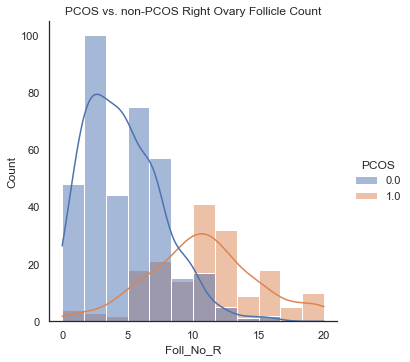

In [71]:
sns.displot(data = PCOS_woinf_ANOVA, x = "Foll_No_R", hue = 'PCOS', kde = True).set(title = "PCOS vs. non-PCOS Right Ovary Follicle Count")

In the cycle length distributions below, we can make the following observations:

- non-PCOS patients period duration is centered around 5 days and is a tighter distribution indicating less variation in cycles. This would indicate a regular period and regular cycle.
- PCOS patients distribution is flatter, indicating more variation in cycles which would be irregular. 

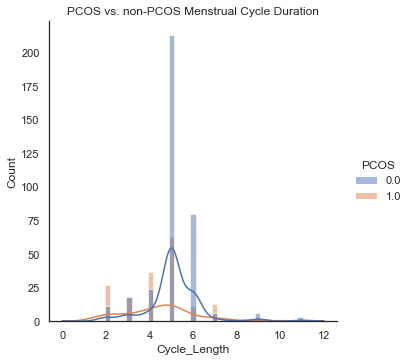

In [72]:
sns.displot(data = PCOS_woinf_ANOVA, x = "Cycle_Length", hue = 'PCOS', kde = True).set(title = "PCOS vs. non-PCOS Menstrual Cycle Duration")

The Anti-Mullerian Hormone corresponds to a person's eggcount. Average levels are between 1 ng/mL to 3.0 ng/mL. Low levels are under 1.0. In the distributions below, we can make the following observations:

- non-PCOS pateints have higher counts between the average level range.
- PCOS patients have lower counts in the average level range, but it's more spread into the higher range.

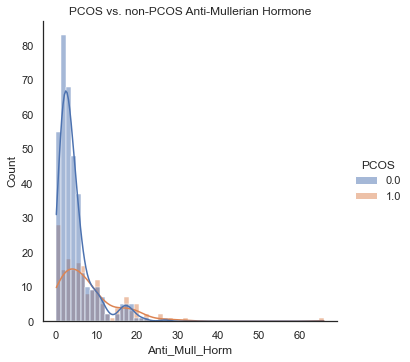

In [73]:
sns.displot(data = PCOS_woinf_ANOVA, x = "Anti_Mull_Horm", hue = 'PCOS', kde = True).set(title = "PCOS vs. non-PCOS Anti-Mullerian Hormone")

There has been research linked to obsesity and PCOS. In the distributions below, the non-PCOS patients have a tighter curve centered around 34 inches, while non-PCOS pateints have a wider distribution indicating more variability. This might require additional investigation.

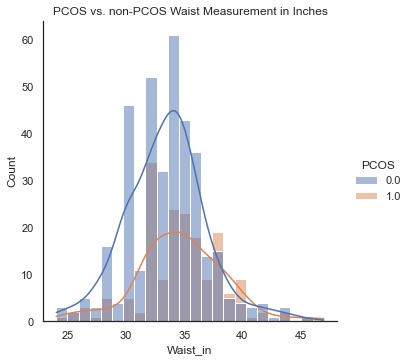

In [74]:
sns.displot(data = PCOS_woinf_ANOVA, x = "Waist_in", hue = 'PCOS', kde = True).set(title = "PCOS vs. non-PCOS Waist Measurement in Inches")

In the age distributions below, it looks like that PCOS patients are younger than non-PCOS pateints. 

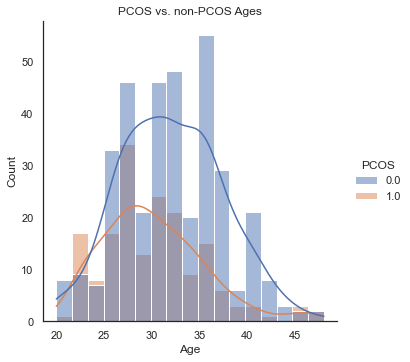

In [75]:
sns.displot(data = PCOS_woinf_ANOVA, x = "Age", hue = 'PCOS', kde = True).set(title = "PCOS vs. non-PCOS Ages")

In non-PCOS pateints, it looks like there is much variability in the distribution. The distribution for PCOS pateints looks more normal, however, there is still variation. 

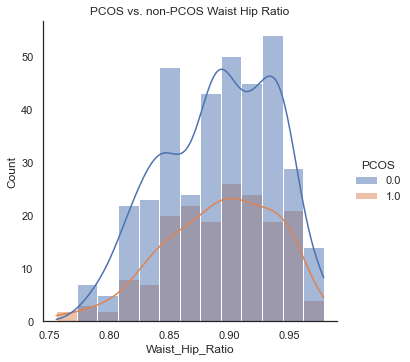

In [76]:
sns.displot(data = PCOS_woinf_ANOVA, x = "Waist_Hip_Ratio", hue = 'PCOS', kde = True).set(title = "PCOS vs. non-PCOS Waist Hip Ratio")

Prolactin is a hormone that is often checked for infertility or irregular menstrual periods. Normal values for prolactin are:

- Men: Less than 20 ng/mL 
- Nonpregnant Women: less than 25 ng/mL
- Pregnant Women: 80 to 400 ng/mL

Non-PCOS patients have a tighter, smoother distribution indicating less variation. It looks like most pateints in both groups have 25 ng/mL or more. However, there are several pateints in both groups less than 20 ng/mL indicating 'normal' male values.

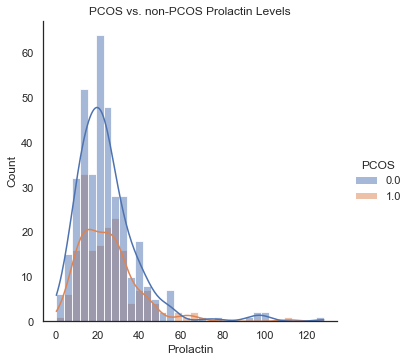

In [77]:
sns.displot(data = PCOS_woinf_ANOVA, x = "Prolactin", hue = 'PCOS', kde = True).set(title = "PCOS vs. non-PCOS Prolactin Levels")

Now that we've taken a look at the numerical features that are correlated with PCOS, let's take a look at the symptoms in our data set which are categorical features.

In [78]:
#To tabularize the categoical features, we need to create a new DataFrame that gives us the ability 
#to view the data by those patinets that are exhibiting symptom and by their PCOS diagnosis. This will require
#to use the melt() function to change the structure of our dataframe.

test_df = PCOS_woinf.melt(id_vars = "PCOS (Y/N)", value_vars = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Acne (Y/N)', 'Reg.Exercise(Y/N)', 'Pregnant(Y/N)'], var_name = "Symptom",  value_name = "Exhibits_Symptom")

In [79]:
#Using the melted dataframe test_df to tabularize our data. 

symptom_data_table = pd.crosstab(test_df.Symptom, columns = [test_df["PCOS (Y/N)"], test_df.Exhibits_Symptom]).apply(lambda row: row/row.sum(), axis = 1)

In [80]:
#Formatting the data so it's easier to read. In the table below, the minimum values are highlighted in dark blue.

symptom_data_table.loc[:].style.highlight_min(axis=1, props='color:white; font-weight:bold; background-color:coral;')

In [81]:
#Formatting the data so it's easier to read. In the table below, the maximum values are highlighted in dark blue.

symptom_data_table.loc[:].style.highlight_max(axis=1, props='color:white; font-weight:bold; background-color:coral;')

Observations about Symptoms:

- Most patients that are not diagnosed with PCOS do not exhibit any symptoms. 
- Pateints that ARE diagnosed with PCOS, have the lowest percentages of exhibiting symptoms of both Acne and Hair Loss. 
- Pateints that ARE diagnosed with PCOS, make up the smallest percentage of patients that were pregant in our sample. 

## Conclusion

To conclude our Exploratory Data Analysis, let's revisit our research questions:

 #### 1. Are there any features that are correlated with PCOS? 
 
  - The original data set had 45 features, after data cleaning and pre-processing, we had 43 features to analyze.
  - We went from 43 features to 27 features by creating a Correlation Matrix to see which features were correlated with each other and dropped any features that had a value of 0.7 or higher: `Weight (Kg)`, `Weight (lbs)`, `Follicle (L)`, `FSH/LH`, `Hip(inch)`, and `Height (cm)`. 
  - After the Correlation Matrix, we created a new DataFrame `PCOS_woinf_ANOVA` to analyze only the 27 kept features using One-Way ANOVA.
  - Once we conducted the One-Way ANOVA, we saw that only 8 out of the 27 features showed statistical evidence that they differ from PCOS indicating that those features might be correlated with a PCOS diagnosis:
        - `Foll_No_R`
        - `Cycle_Length`
        - `Anti_Mull_Horm`
        - `Waist_in`
        - `Age`
        - `Prolactin`
        - `Follicle_Stim_Horm`
        - `Waist_Hip_Ratio`

- After we identified these 8 features, we plotted histograms to validate and visualize the difference between non-PCOS and PCOS patients. 
- Based on our analysis, these 8 features show an indication that they are correlated with PCOS. 
- Since PCOS characteristics do vary, this might assist providers in providing a starting point for conducting their exams for a PCOS diagnosis.

#### 2. What are the most frequent symptoms PCOS pateints exihibit?

- Weight Gain, Acne and Skin Darkening are the most frequent symptoms PCOS pateints exhibit.

#### 3. Do non-PCOS patients exhibit similar symptoms to those diagnosed with PCOS?

- Acne and Hair Loss are the most frequent symptoms in our sample in non-PCOS pateints. However, most of the non-PCOS pateints have fairly low percentages of experiencing any symptoms compared to PCOS pateints. 

#### Additional EDA

 - For additional analysis, I created a DataFrame `PCOS_outiers_removed` to remove outliers.
 - Since we cannot safely assume that all of our data is normal, I chose to leave the outliers in as it's already a small data set.
 - Code and DataFrame defined below if you would like to take a look at the various plots and data using the DataFrame with outliers removed.

In [82]:
constraints = PCOS_woinf.select_dtypes(include = [np.number]).apply(lambda x: np.abs(stats.zscore(x)) < 3, result_type = 'expand').all(axis = 1)
PCOS_outliers_removed = PCOS_woinf.drop(PCOS_woinf.index[~constraints], inplace = False)
PCOS_outliers_removed.shape

(427, 46)

In [83]:
#Using the crosstab function to create a simple table of PCOS diagnosis and if that patient is pregnant or not. 

pregnancy = pd.crosstab(index = PCOS_woinf["PCOS (Y/N)"], columns = PCOS_woinf['Pregnant(Y/N)'], margins = True, margins_name = "Total", normalize = "index").round(2)
pregnancy

Pregnant(Y/N),False,True
PCOS (Y/N),,
0.0,0.61,0.39
1.0,0.64,0.36
Total,0.62,0.38


<AxesSubplot:xlabel='PCOS (Y/N)'>

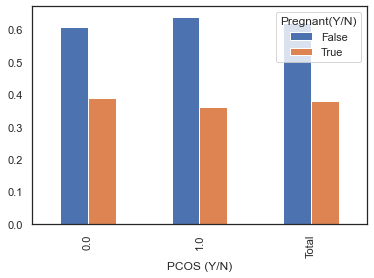

In [84]:
pregnancy.plot.bar(stacked = False)